# Imports & Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Set plot style
sns.set(style="whitegrid")

#  Load Data

In [3]:
# Load the CLEANED data scripts
try:
    df = pd.read_csv('../data/cleaned_reviews.csv')
    print(f"Data Loaded: {len(df)} rows")
    display(df.head())
except FileNotFoundError:
    print("Error: CSV not found. Run src/cleaner.py first!")

Data Loaded: 1346 rows


,review_text,rating,review_date,bank_name,source
0,Although the UI is simple and easy to use. Tha...,1,2025-07-16,CBE,Google Play
1,"WHAT A USELESS APP! Transfers, wallet payments...",1,2025-09-13,CBE,Google Play
2,"Most of the time when I try to open the app, i...",2,2025-09-24,CBE,Google Play
3,I use the Commercial Bank of Ethiopia mobile a...,5,2025-08-22,CBE,Google Play
4,"It is good app and really user friendly , but ...",4,2025-09-05,CBE,Google Play


# Sentiment Analysis

In [4]:
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

df['sentiment_score'] = df['review_text'].apply(get_sentiment)

# Categorize
def label_sentiment(score):
    if score > 0.05: return 'Positive'
    elif score < -0.05: return 'Negative'
    else: return 'Neutral'

df['sentiment_label'] = df['sentiment_score'].apply(label_sentiment)

# Check distribution
df['sentiment_label'].value_counts()

sentiment_label
Positive    755
Negative    326
Neutral     265
Name: count, dtype: int64

# Visualization 1 - Sentiment Distribution

C:\Users\isaac\AppData\Local\Temp\ipykernel_3260\4099936150.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=df, palette='viridis', order=['Negative', 'Neutral', 'Positive'])


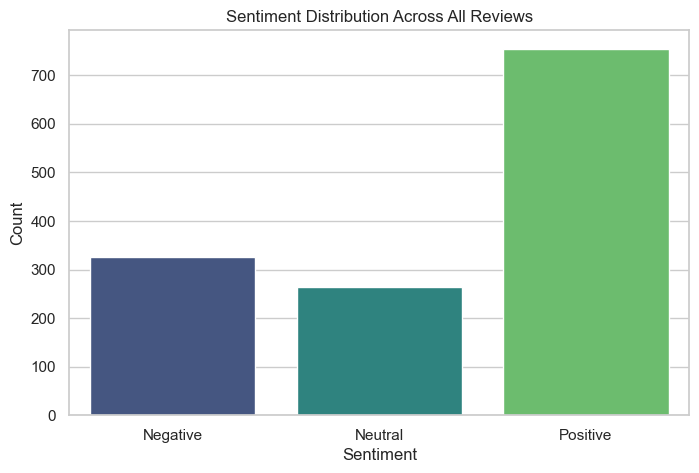

In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment_label', data=df, palette='viridis', order=['Negative', 'Neutral', 'Positive'])
plt.title('Sentiment Distribution Across All Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Visualization 2 - Comparison by Bank

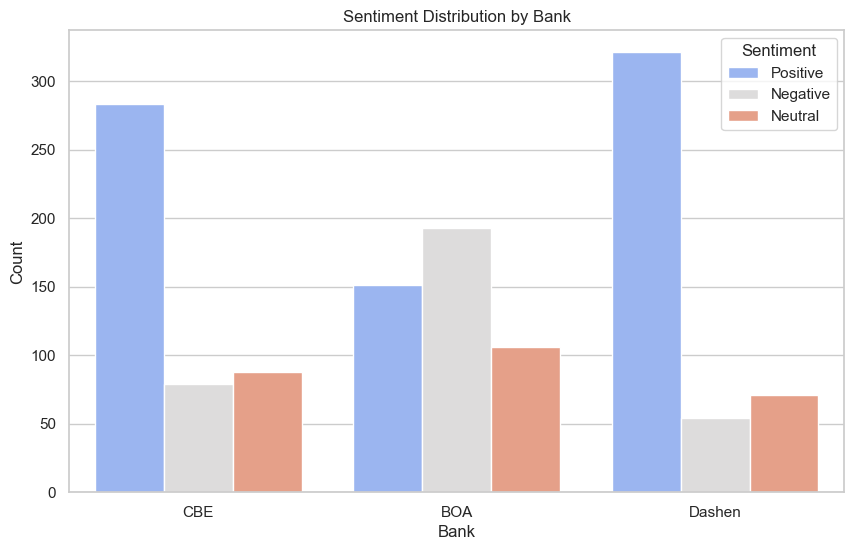

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='bank_name', hue='sentiment_label', data=df, palette='coolwarm')
plt.title('Sentiment Distribution by Bank')
plt.xlabel('Bank')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

# Visualization 3 - Ratings vs Sentiment

C:\Users\isaac\AppData\Local\Temp\ipykernel_3260\3836458420.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='sentiment_score', data=df, palette='pastel')


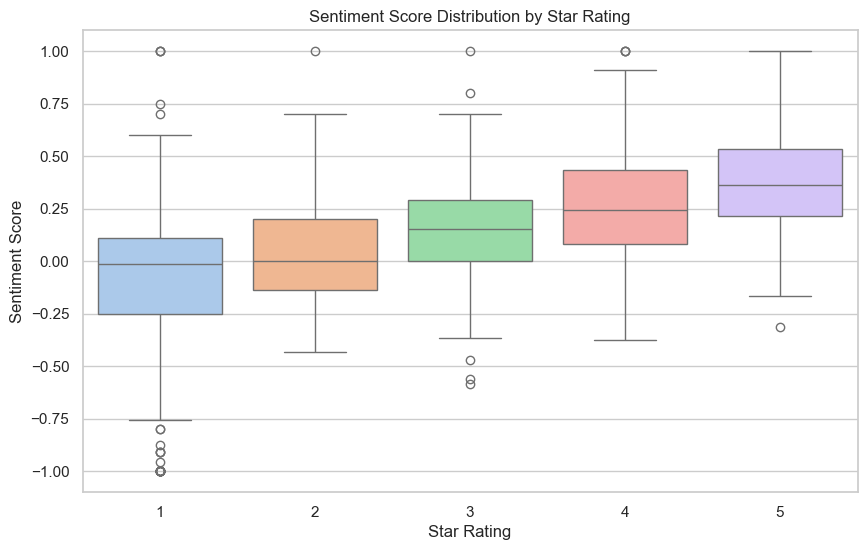

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='sentiment_score', data=df, palette='pastel')
plt.title('Sentiment Score Distribution by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Sentiment Score')
plt.show()